# 岭回归

In [1]:
from sklearn.linear_model import Ridge

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [4]:
def RidgeRegression(degree,alpha):
    """将通过管道后的模型封装成一个函数  返回岭回归模型"""
    
    #使用管道
    return Pipeline([
        ("poly_feat",PolynomialFeatures(degree=degree)),
        ("standard_scaler",StandardScaler()),
        ("rigde_reg",Ridge(alpha=alpha))
    ])

In [5]:
def PolynomialRegression(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", LinearRegression())
    ])

In [6]:
def plot_model(model):
    X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
    y_plot = model.predict(X_plot)

    plt.scatter(x, y)
    plt.plot(X_plot[:,0], y_plot, color='r')
    plt.axis([-3, 3, 0, 6])
    plt.show()

### 编点数据

In [7]:
np.random.seed(42)
x = np.random.uniform(-3.0, 3.0, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x + 3 + np.random.normal(0, 1, size=100)

In [8]:
X_train,X_test,y_train,y_test  = train_test_split(X,y)

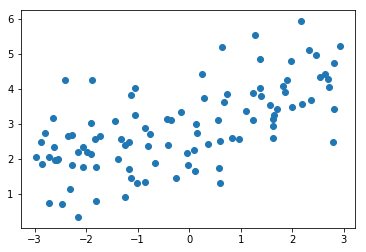

In [9]:
plt.scatter(x,y)
plt.show()

In [10]:
#### 下面的模型 是过拟合的模型

In [11]:
pr = PolynomialRegression(20)

In [12]:
pr.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=20, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lin_reg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

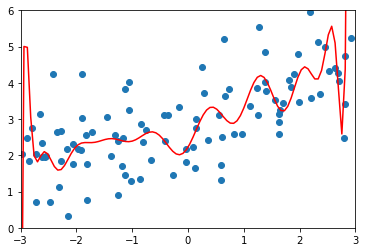

In [13]:
plot_model(pr)

In [14]:
y_p = pr.predict(X_test)

In [15]:
mean_squared_error(y_test,y_p)

39.412209761305562

### 使用岭回归

1.10954897307


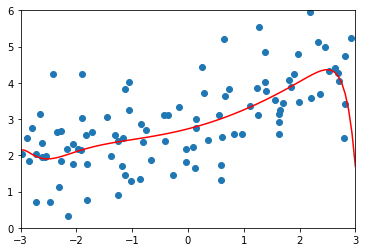

In [16]:
ridge_reg = RidgeRegression(20,1)

ridge_reg.fit(X_train,y_train)

y_pl1 = ridge_reg.predict(X_test)

print(mean_squared_error(y_test,y_pl1 ))
plot_model(ridge_reg)

1.08935304097


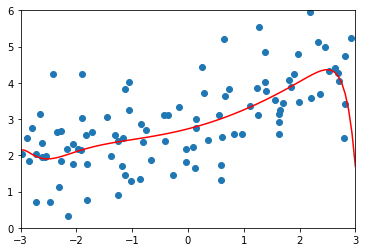

In [17]:
ridge_reg1e4 = RidgeRegression(20,0.0001)

ridge_reg1e4.fit(X_train,y_train)

y_p1e4 = ridge_reg1e4.predict(X_test)

print(mean_squared_error(y_test,y_p1e4))

plot_model(ridge_reg)

1.11790672801


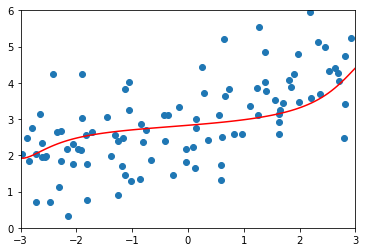

In [18]:
ridge_reg100 = RidgeRegression(20,100)

ridge_reg100.fit(X_train,y_train)

y_p100 = ridge_reg100.predict(X_test)
print(mean_squared_error(y_test,y_p100))

plot_model(ridge_reg100)

1.67452836365


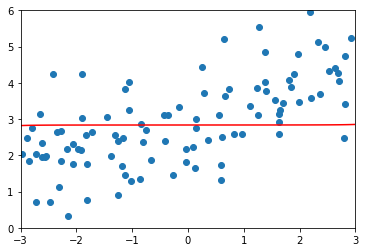

In [19]:
ridge_reg100000 = RidgeRegression(20,100000)

ridge_reg100000.fit(X_train,y_train)

y_p100000 = ridge_reg100000.predict(X_test)
print(mean_squared_error(y_test,y_p100000))

plot_model(ridge_reg100000)